---
**License**

 TestInterp

 Mon Jan 25 20:56:00 2020\
 Copyright  2021\
 Eduardo ...\
 Sandro Dias Pinto Vitenti <vitenti@uel.br>

---
---

 TestInterp\
 Copyright (C) 2021 Eduardo ...\
 Copyright (C) 2021 Sandro Dias Pinto Vitenti <vitenti@uel.br>


 numcosmo is free software: you can redistribute it and/or modify it
 under the terms of the GNU General Public License as published by the
 Free Software Foundation, either version 3 of the License, or
 (at your option) any later version.

 numcosmo is distributed in the hope that it will be useful, but
 WITHOUT ANY WARRANTY; without even the implied warranty of
 MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.
 See the GNU General Public License for more details.

 You should have received a copy of the GNU General Public License along
 with this program.  If not, see <http://www.gnu.org/licenses/>.
 
---

In [1]:
try:
  import gi
  gi.require_version('NumCosmo', '1.0')
  gi.require_version('NumCosmoMath', '1.0')
except:
  pass

import sys
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from scipy.optimize import minimize

from gi.repository import NumCosmo as Nc
from gi.repository import NumCosmoMath as Ncm
%matplotlib inline

In [2]:
__name__ = "NcContext"

Ncm.cfg_init ()
Ncm.cfg_set_log_handler (lambda msg: sys.stdout.write (msg) and sys.stdout.flush ())

In [3]:
dim = 15
np.random.seed(seed=123)
    
p = np.random.random_sample((dim,))
print (p)

[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897 0.42310646
 0.9807642  0.68482974 0.4809319  0.39211752 0.34317802 0.72904971
 0.43857224 0.0596779  0.39804426]


In [4]:
rng = Ncm.RNG.seeded_new (None, 123)

fmodel = Ncm.ModelMVND.new (dim)
fdata = Ncm.DataGaussCovMVND.new_full (dim, 0.1, 0.4, 10.0, -1.0, 1.0, rng)

fdata.props.use_norma = True

mset = Ncm.MSet.new_array ([fmodel])
mset.param_set_all_ftype (Ncm.ParamType.FREE)
mset.prepare_fparam_map ()

mset.fparams_set_array (p)
mset.pretty_log ()

#----------------------------------------------------------------------------------
# Model[00000]:
#   - NcmModelMVND : MVND
#----------------------------------------------------------------------------------
# Model parameters
#   -  mu_0[00]:  0.696469185597862   [FREE]
#   -  mu_1[01]:  0.286139334950379   [FREE]
#   -  mu_2[02]:  0.226851453564203   [FREE]
#   -  mu_3[03]:  0.551314769082891   [FREE]
#   -  mu_4[04]:  0.719468969785563   [FREE]
#   -  mu_5[05]:  0.423106460124461   [FREE]
#   -  mu_6[06]:  0.980764198384615   [FREE]
#   -  mu_7[07]:  0.684829738584863   [FREE]
#   -  mu_8[08]:  0.480931901484361   [FREE]
#   -  mu_9[09]:  0.392117518194151   [FREE]
#   - mu_10[10]:  0.343178016150869   [FREE]
#   - mu_11[11]:  0.729049707384042   [FREE]
#   - mu_12[12]:  0.438572244679624   [FREE]
#   - mu_13[13]:  0.0596778966095683  [FREE]
#   - mu_14[14]:  0.398044255330431   [FREE]


In [5]:
y_a = []
x_a = []
xn_a = []

#interp = Ncm.StatsDistNdKDEStudentt.new (len (p), Ncm.StatsDistNdCV.NONE, 3.0)
interp = Ncm.StatsDistNdKDEGauss.new (len (p), Ncm.StatsDistNdCV.NONE)
nps = 500

for a in range (nps):
    v, N = fdata.gen (mset, None, None, rng)
    interp.add_obs (v)
    y_a.append (fdata.m2lnL_val (mset))
    x_a.append (v.dup_array ())

for a in range (nps):
    v, N = fdata.gen (mset, None, None, rng)
    xn_a.append (v.dup_array ())

y_a = np.array (y_a)
x_a = np.array (x_a)
xn_a = np.array (xn_a)

fdata.y.set_array (p)

fdata.m2lnL_val (mset)

-21.627304805085192

In [6]:
interp.set_cv_type (Ncm.StatsDistNdCV.SPLIT)
interp.prepare_interp (Ncm.Vector.new_array (y_a))
interp.set_cv_type (Ncm.StatsDistNdCV.NONE)

calib_os = interp.get_over_smooth ()

print (interp.get_rnorm (), calib_os)



OS:                      1, RNORM:      0.600887770990936
OS:       1.10517091807565, RNORM:      0.594002223854727
OS:       1.22140275816017, RNORM:      0.574569303592521
OS:         1.349858807576, RNORM:      0.530138816534928
OS:       1.64872127070013, RNORM:         0.411598316293
OS:       2.01375270747048, RNORM:      0.892926525719508
OS:       2.01375270747048, RNORM:      0.892926525719507
OS:       1.49182469764127, RNORM:      0.456059010394587
OS:       1.82211880039051, RNORM:      0.565082978752441
OS:       1.56831218549017, RNORM:      0.420892758822804
OS:       1.73325301786739, RNORM:      0.456550540245671
OS:       1.60801419748578, RNORM:      0.411289505139479
OS:       1.56831218549017, RNORM:      0.420892758822804
OS:       1.62824052614551, RNORM:      0.409941731753235
OS:       1.64872127070013, RNORM:         0.411598316293
OS:       1.61809575827999, RNORM:      0.410281257716635
OS:       1.63844889736362, RNORM:      0.410357185335728
OS:       1.62

In [7]:
print (calib_os)

1.6279197469600966


In [8]:
interp.set_over_smooth (calib_os)
interp.prepare_interp (Ncm.Vector.new_array (y_a))

OS:        1.6279197469601, RNORM:      0.409941358384227


mean error  2.01e-01
Prob accept 74.2%


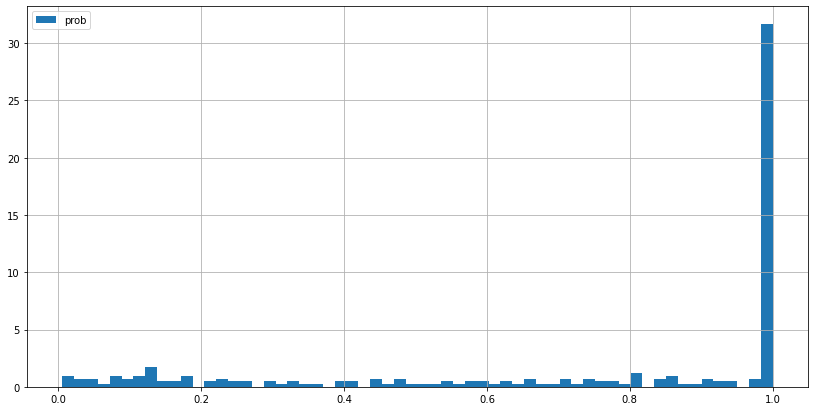

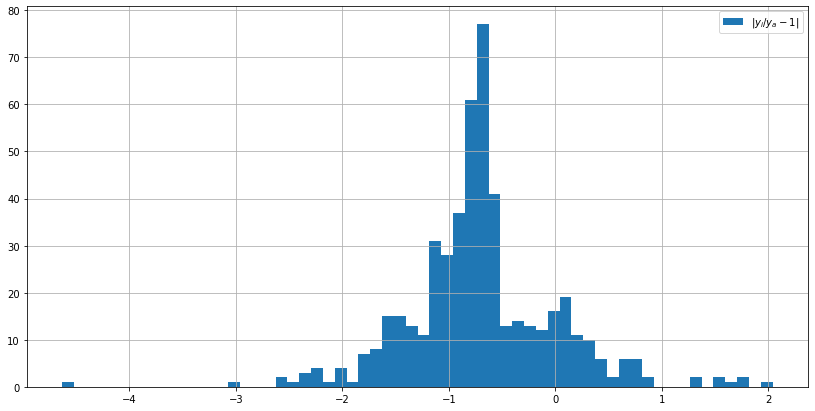

In [9]:
       
yi_a = []
ya_a = []
yi_b = []

for x in xn_a:
    mset.fparams_set_array (x)
    fdata.prepare (mset)
    yi_a.append (interp.eval_m2lnp (Ncm.Vector.new_array (x)))
    ya_a.append (fdata.m2lnL_val (mset))

yi_a = np.array (yi_a)
ya_a = np.array (ya_a)

m = -np.mean (yi_a - ya_a)
diff = (yi_a + m) / ya_a - 1.0

probs = np.minimum(np.exp (-0.5*((yi_a[0::2]-ya_a[0::2])-(yi_a[1::2]-ya_a[1::2]))), 1.0)
bfact = np.abs(np.exp (-0.5*((yi_a[0::2]-ya_a[0::2])-(yi_a[1::2]-ya_a[1::2])))-1.0)

mean_err = 10**(np.mean (np.log10 (np.abs (diff))))

print ("mean error  %.2e" % (mean_err))
print ("Prob accept %.1f%%" % (100.0 * np.mean (probs)))

plt.figure (figsize=(14, 7))

plt.hist (probs, label='prob', bins = 60, density=True)
plt.grid ()
plt.legend(loc='best')
plt.show ()

plt.figure (figsize=(14, 7))

plt.hist (np.log10 (np.abs (diff)), bins = 60, label=r'$|y_i/y_a - 1|$')
plt.grid ()
plt.legend(loc='best')
plt.show ()
